# 1.Setup and Load Data

## 1.1 Install Dependencies and Setup

In [1]:
!pip install tensorflow matplotlib
!pip install opencv-python
!pip install tensorflow 


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.2.0
anyio                        4.9.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    3.0.0
astunparse                   1.6.3
async-lru                    2.0.5
attrs                        25.3.0
babel                        2.17.0
beautifulsoup4               4.13.3
bleach                       6.2.0
blinker                      1.9.0
certifi                      2025.1.31
cffi                         1.17.1
charset-normalizer           3.4.1
click                        8.1.8
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.1
cycler                       0.12.1
debugpy                      1.8.13
decorator                    5.2.1
deepface                     0.0.93
defusedxml                   0.7.1
executing                    2.


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import tensorflow as tf
import os

In [ ]:
#Avoid OOM errors by setting GPU Memory Consuption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

## 1.2 Remove Dodgy images

In [ ]:
import cv2
import imghdr

from matplotlib import pyplot as plt

C:\Users\OJASVI\AppData\Local\Temp\ipykernel_10936\794839559.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [ ]:
data_dir = 'data'

In [ ]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

#to get the list of all defective images
os.listdir(os.path.join(data_dir, 'defective'))


#img=cv2.imread(os.path.join('data', 'healthy', 'th (2).jpeg'))

#gives shape dimentions of the images
(img.shape)

#shows the image itself

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            

## 1.3 Load data

In [ ]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [ ]:
data= tf.keras.utils.image_dataset_from_directory('data')

Found 435 files belonging to 2 classes.


In [ ]:
data_iterator= data.as_numpy_iterator()

In [ ]:
#get another batch from iterator 
batch = data_iterator.next()

In [ ]:
# image reresented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
# class 1 = healthy leaves
#class 0 = defective leaves
batch[1]

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int32)

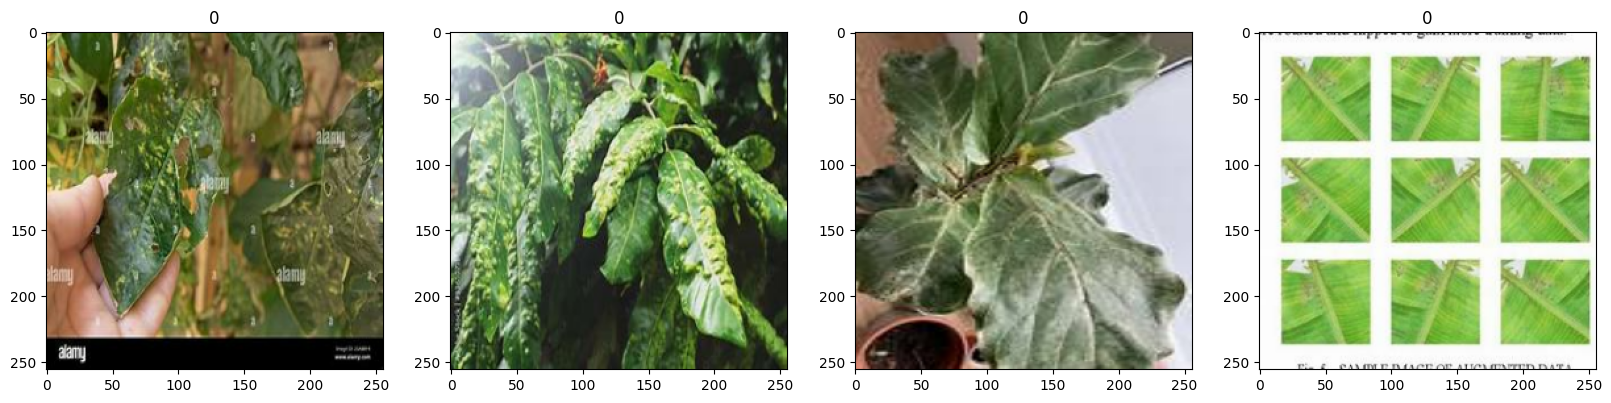

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
scaled = batch[0] / 255
scaled.max()

np.float32(1.0)

# 2. Pre process Data

## 2.1 Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

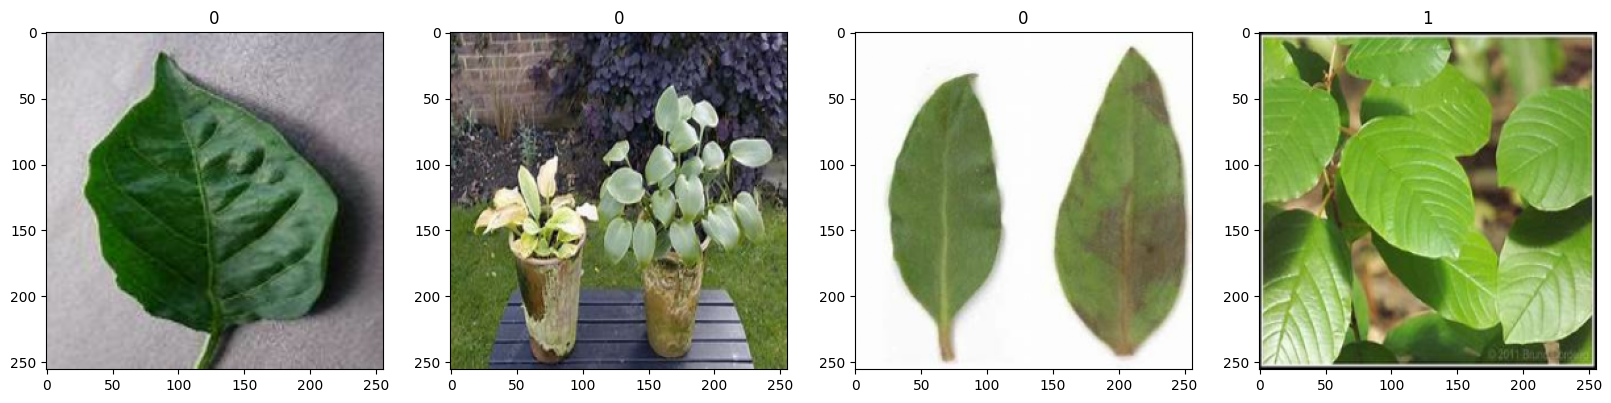

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Split Data

In [ ]:
len(data) 

14

In [ ]:
train_size= int(len(data)*.7)
val_size= int(len(data)*.2)+1
test_size= int(len(data)*.1)+1

In [ ]:
train_size+val_size+test_size

14

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 3. Deep Model

## 3.1 Build Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\OJASVI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics= ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 3.2 Train

In [ ]:
logdir= 'log'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 951ms/step - accuracy: 0.6558 - loss: 0.8972 - val_accuracy: 0.7604 - val_loss: 0.4924
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 716ms/step - accuracy: 0.7370 - loss: 0.5007 - val_accuracy: 0.8229 - val_loss: 0.5352
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 666ms/step - accuracy: 0.7882 - loss: 0.4806 - val_accuracy: 0.9271 - val_loss: 0.4893
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 653ms/step - accuracy: 0.8774 - loss: 0.4163 - val_accuracy: 0.8854 - val_loss: 0.3015
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 739ms/step - accuracy: 0.8944 - loss: 0.2916 - val_accuracy: 0.9583 - val_loss: 0.2251
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 686ms/step - accuracy: 0.9280 - loss: 0.2201 - val_accuracy: 0.9688 - val_loss: 0.1373
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 697ms/step - accuracy: 0.9436 - loss: 0.1773 - val_accuracy: 0.9688 - val_loss: 0.1090
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 663ms/step - accuracy: 0.9550 - loss: 0.1305 - val_accuracy: 0.9688 - val_los

In [ ]:
hist.history

{'accuracy': [0.6805555820465088,
  0.7361111044883728,
  0.7777777910232544,
  0.8611111044883728,
  0.8854166865348816,
  0.9270833134651184,
  0.9513888955116272,
  0.9548611044883728,
  0.96875,
  0.9722222089767456,
  0.9895833134651184,
  0.9861111044883728,
  0.9826388955116272,
  0.9895833134651184,
  0.9930555820465088,
  0.9826388955116272,
  0.9861111044883728,
  0.9826388955116272,
  0.9930555820465088,
  0.9895833134651184],
 'loss': [0.7815244197845459,
  0.5361675024032593,
  0.46930450201034546,
  0.3809327781200409,
  0.29605546593666077,
  0.20553624629974365,
  0.15759144723415375,
  0.1372288316488266,
  0.096451036632061,
  0.06521527469158173,
  0.05270453169941902,
  0.0428265780210495,
  0.05028507113456726,
  0.027384184300899506,
  0.027685103937983513,
  0.04671744629740715,
  0.044405918568372726,
  0.03557978570461273,
  0.07257962226867676,
  0.0364435575902462],
 'val_accuracy': [0.7604166865348816,
  0.8229166865348816,
  0.9270833134651184,
  0.88541668

## 3.3 Plot Performance

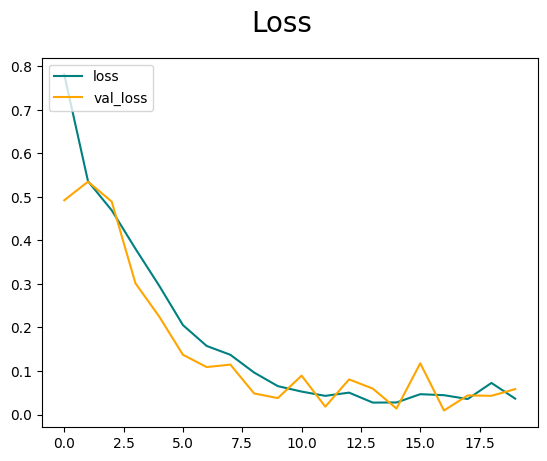

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

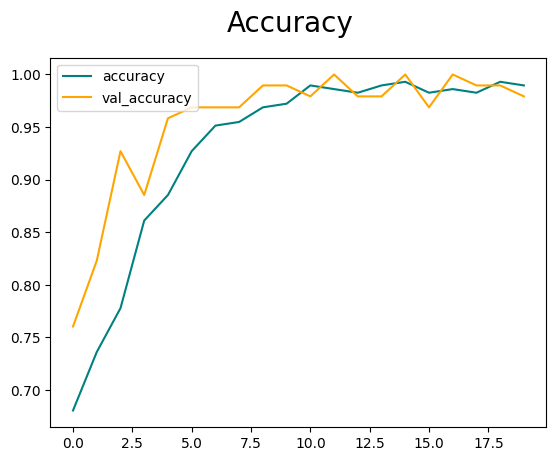

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate Performance

## 4.1 Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')


Precision: 0.9285714030265808, Recall: 1.0, Accuracy: 0.9803921580314636


## 4.2 Test

In [ ]:
import cv2

Please enter the address of the image: C:\Users\OJASVI\Desktop\jupyter_projects\image_classification\defectivetest.jpg


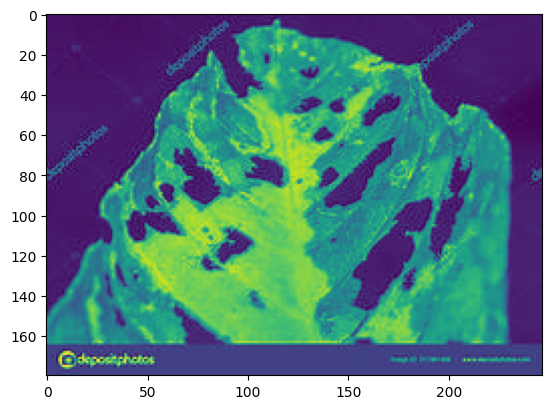

In [ ]:
img_path = input('Please enter the address of the image:')
#img_path= r'C:\Users\OJASVI\Desktop\jupyter_projects\image_classification\healthytest.jpg'
#image_path = img_path
img = cv2.imread(img_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)
plt.show()
execute_next_cell()

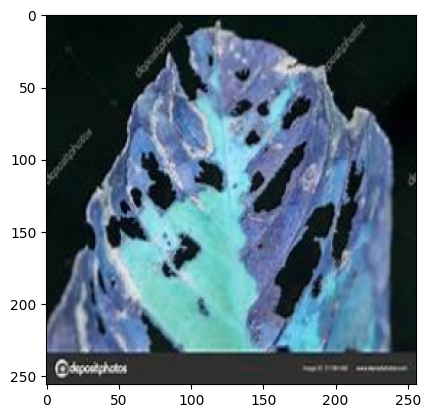

In [ ]:
resize= tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


In [ ]:
yhat

array([[0.42602438]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is healthy')
else:
    print(f'Predicted class is defective ')

Predicted class is defective 


# 5. Save the Model

## 5.1 Save the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models', 'leafdetectionmodel.h5'))

In [ ]:
new_model = load_model(os.path.join('models', 'leafdetectionmodel.h5'))

In [ ]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


In [ ]:
if yhat > 0.5:
    print(f'Predicted class is healthy')
else:
    print(f'Predicted class is defective ')

Predicted class is defective 
